# Принятие решений в бизнесе на основе данных

<div style="border:solid blue 2px; padding: 20px"> 

Необходимо для отдела маркетинга крупного интернет-магазина проверить гипотезы для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
    
      
Часть 1. [Приоритизация гипотез.](#step1)    
1. [Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step2)  
2. [Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#step3)  
3. [Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.](#step4) 
4. [Визуализация гипотез](#step20)
5. [Выбор статистического критерия](#step21)
    
    
Часть 2. [Анализ A/B-теста](#step5)  
1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#step6)  
2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#step7)  
3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#step8)
4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#step9)
5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#step10)
6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#step11)
7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#step12)
8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#step13)
9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#step14)
10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#step15)
11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#step16)
12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#step17)
13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#step18)
14. [Примите решение по результатам теста и объясните его.](#step19)  
    Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

</div>

<div class="alert alert-block alert-info"> 
    <div style="border:solid black 2px; padding: 20px">
     <h1 style="color:blue; margin-bottom:20px">Вывод</h1>
        
Приоритизиуя гипотезы согласно `ICE` и `RICE` методам рекомендую проверить первыми 2 гипотезы:  <br>
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	<br>
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	<br>

Останавливаем тест.  <br>
Фиксируем победу группы `B` .<br>
Признаем тест успешным.  <br>
После "очистки" данных получили стат. знач. в конверсии. Конверсия группы `В` лучше на 17.8%. Стат. знач. различий в среднем чеке не выявлено. <br>
Т.е. средний чек не изменился, а конверсия увеличилась, что потверждают графики по "очищенным" данным ниже. 
          
</div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
sns.set_style('darkgrid')

In [4]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

## Часть 1. Приоритизация гипотез.<a id="step1"></a>

### <a id="step2"></a>1. Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


---

<div class="alert alert-block alert-warning">
    
<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
</div>

---

In [5]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [8]:
pd.set_option('display.max_colwidth', 110)
# hypothesis

In [9]:
n = 8
hypothesis.nlargest(n, 'ICE')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000


### <a id="step3"></a>2. Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### nlargest, выбрать топ-N

In [8]:
n = 8
hypothesis.nlargest(n, 'RICE')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0


In [9]:
#hypothesis.nsmallest(n, 'RICE')

In [10]:
#hypothesis.sort_values(by='ICE', ascending=False).head(n)

### <a id="step4"></a>3. Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

#### Т.к. в числителе метрики `RICE` участвует охват, то гипотезы с высоким охватом поднялись вверх списа 

### <a id="step20"></a>4. Визуализация гипотез 

### Lolipop chart

In [11]:
def lolipop_plot(df, metric):
    
    '''
    Функция получает на вход датафрейм и название метрики, выводит Lolipop chart
    '''
    
    ordered_df = df.sort_values(by = metric).reset_index() # Сортируем датасет по выбранной метрике и сбрасываем индекс
    line_order = ordered_df.index # Сохраняем индекс / порядковый номер гипотез для графика
    
    plt.hlines(y = line_order, xmin = 0, xmax = ordered_df[metric], color='skyblue') # Строим горизонтальные линии от 0 до значения метрики
    plt.plot(ordered_df[metric], line_order, 'o') # Добавляем точки на конец линии
    
    plt.yticks(line_order, ordered_df['Hypothesis']) # Заменяем порядковый номер на название гипотезы
    plt.title(metric) # Добавляем название графика

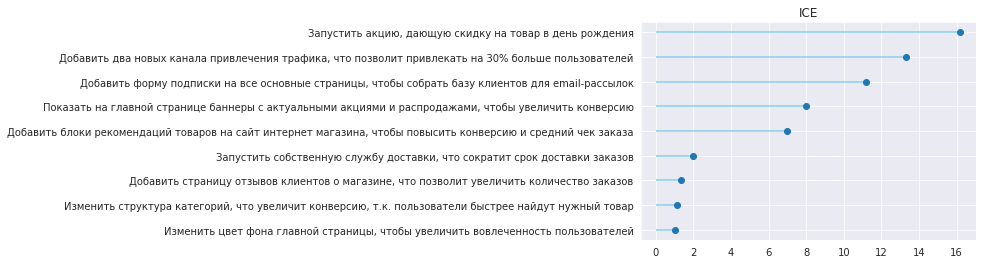

In [12]:
lolipop_plot(hypothesis, 'ICE')

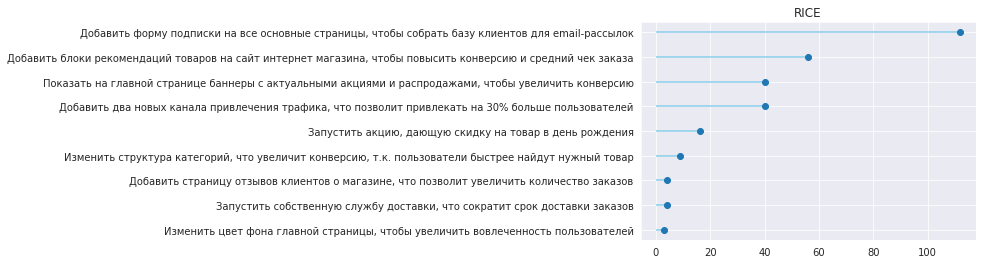

In [13]:
lolipop_plot(hypothesis, 'RICE')

### Dumbbell chart для сравнения ICE & RICE

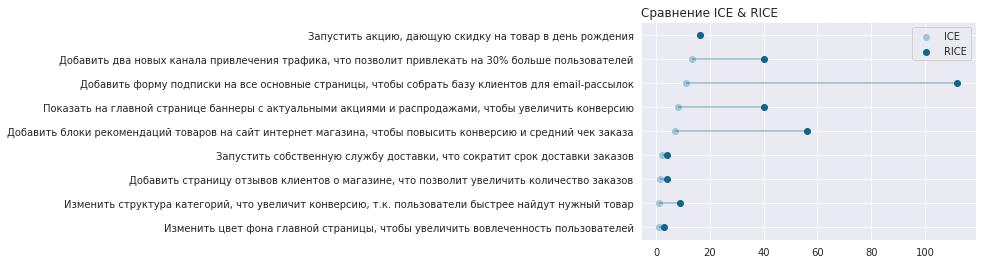

In [14]:
ordered_df = hypothesis.sort_values(by = 'ICE').reset_index() # Сортируем датасет по выбранной метрике и сбрасываем индекс
line_order = ordered_df.index

# Добавляем точки и линии
plt.hlines(y = line_order, xmin = ordered_df['ICE'], xmax = ordered_df['RICE'], color = '#0e668b', alpha = 0.4)
plt.scatter(ordered_df['ICE'], line_order, color = '#a3c4dc', label = 'ICE')
plt.scatter(ordered_df['RICE'], line_order, color = '#0e668b', label = 'RICE')
plt.legend()

# Подписываем
plt.yticks(line_order, ordered_df['Hypothesis'])
plt.title('Сравнение ICE & RICE', loc = 'left')
plt.show()

### <a id="step21"></a>5. Выбор статистического критерия

Перед выбором критерия исследуйте данные на нормальность: 

* __Визуально__
    * гистограмма / QQPlot
* __На основе статистического теста__
     * например, Shapiro-Wilk

In [15]:
from scipy import stats
import pylab

Процедура теста Шапиро-Вилка для проверки распределения на нормальность

In [16]:
def shapiro_wilk_test(colSeries, alpha = 0.05, bins_for_hist = 100):
    
    '''
    Получает на вход колонку датафрейма и возвращает:
        * Результат теста Шапиро Уилка. H0: распределение нормальное; H1: распределение ненормальное
        * Гистограмму
        * QQPlot
    '''
    
    p_value = stats.shapiro(colSeries)[1]
    
    print(f'p-значение:  {p_value:.10f}')
    
    if (p_value < alpha):
        print('Отвергаем H0: распределение не нормальное')
    else:
        print('Не получилось отвергнуть H0: распределение нормальное')
        
    ax = colSeries.plot(kind = 'hist', bins = bins_for_hist)
    ax.set(title = f'Распределение для {colSeries.name}') # Забираем имя Series
    plt.show()
    
    stats.probplot(colSeries, dist = 'norm', plot = pylab)
    plt.title(f'QQ plot для {colSeries.name}')
    plt.show()

p-значение:  0.0000000000
Отвергаем H0: распределение не нормальное


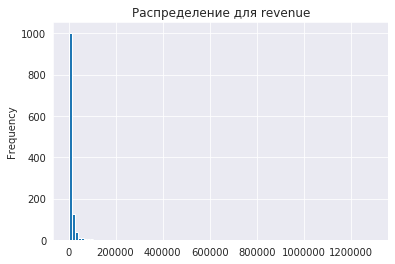

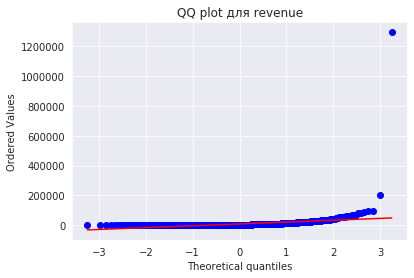

In [17]:
shapiro_wilk_test(orders.revenue)

## Часть 2. Анализ A/B-теста<a id="step5"></a>

In [18]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [20]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


### Задача 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.<a id="step6"></a>

In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [22]:
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [25]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [27]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [28]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [30]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [31]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter,FixedLocator,AutoLocator)
import matplotlib.ticker as ticker

Оставил кучу параметров для примера, чтобы потом можно было посмотреть

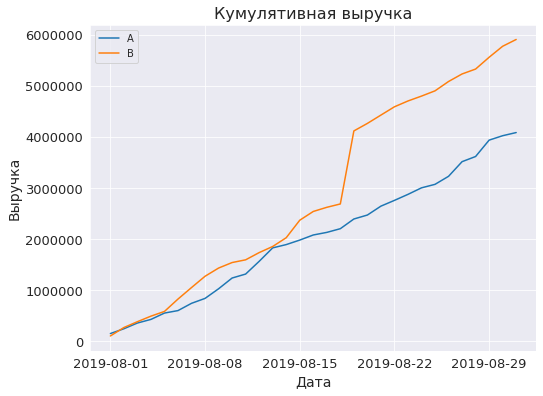

In [32]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
# ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
#                which = 'major',    #  Применяем параметры к основным делениям
#                direction = 'inout',    #  Рисуем деления внутри и снаружи графика
#                length = 20,    #  Длинна делений
#                width = 4,     #  Ширина делений
#                color = 'm',    #  Цвет делений
#                pad = 10,    #  Расстояние между черточкой и ее подписью
#                labelsize = 15,    #  Размер подписи
#                labelcolor = 'r',    #  Цвет подписи
#                bottom = True,    #  Рисуем метки снизу
#                top = True,    #   сверху
#                left = True,    #  слева
#                right = True,    #  и справа
#                labelbottom = True,    #  Рисуем подписи снизу
#                labeltop = True,    #  сверху
#                labelleft = True,    #  слева
#                labelright = True,    #  и справа
#                labelrotation = 45)    #  Поворот подписей
ax.tick_params(axis = 'both', 
               direction='out', 
               #labelrotation = 45,
               labelsize = 13,   
               #labelcolor = 'r'
               )
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Выручка',fontsize=14)
plt.title('Кумулятивная выручка',fontsize=16)
plt.legend();
#plt.show()

Группа `B` стабильно лучше по накопленной выручке, чем группа `A`.Выручка почти равномерно увеличивается в течение всего теста.  В какой-то момент видим резкий рост выручки группы `B`. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Задача 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и <a id="step7"></a>предположения.

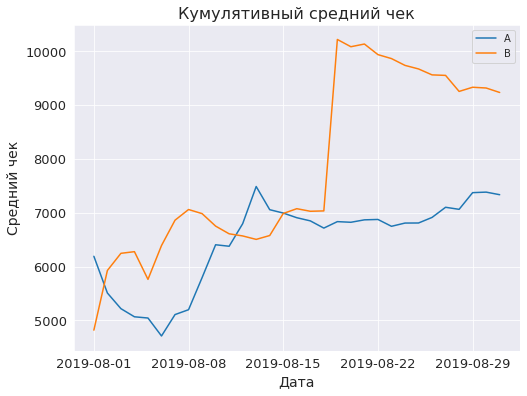

In [33]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Средний чек',fontsize=14)
plt.title('Кумулятивный средний чек',fontsize=16)
plt.legend();

Видим резкий рост среднего чека группы `B`. Появляются крупные заказы.

### <a id="step8"></a>Задача 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B']) 

In [35]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


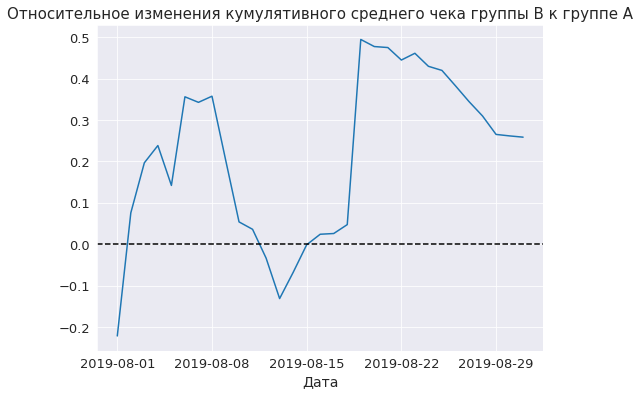

In [36]:
plt.subplots(figsize = (8,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
#ax.set_ylabel('Средний чек',fontsize=14)
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A',fontsize=15);

В нескольких точках график различия между сегментами резко «скачет». Где-то уж спрятались крупные заказы и выбросы

### <a id="step9"></a>Задача 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [37]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [38]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

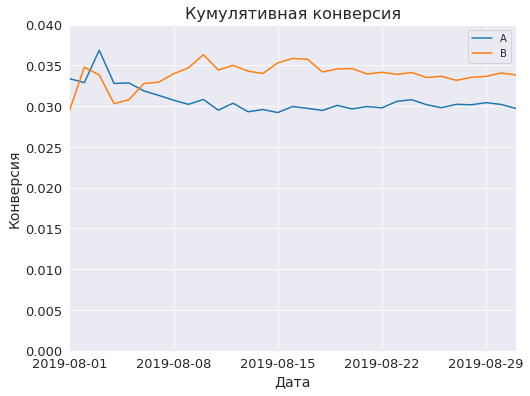

In [39]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31',0, 0.04])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Конверсия',fontsize=14)
plt.title('Кумулятивная конверсия',fontsize=16);

Конверсия группы `B` вырвалась вперёд и зафиксировалась, а конверсия группы `A` просела и также зафиксировалась.

### <a id="step10"></a>Задача 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

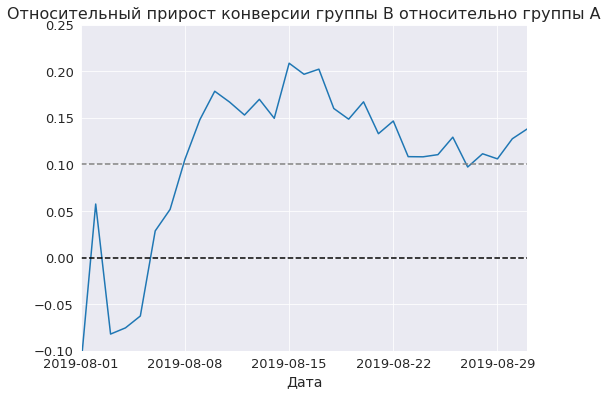

In [41]:
plt.subplots(figsize = (8,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)
#plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31',-0.1, 0.25])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
#ax.set_ylabel('Конверсия',fontsize=14)
plt.title('Относительный прирост конверсии группы B относительно группы A',fontsize=16);

Конверсия группы `B` лучше а конверсия группы `A` и зафиксировалась на уровне выше 0.10

### <a id="step11"></a>Задача 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [42]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})

In [43]:
ordersByUsers.columns = ['userId','orders']

In [44]:
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [45]:
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

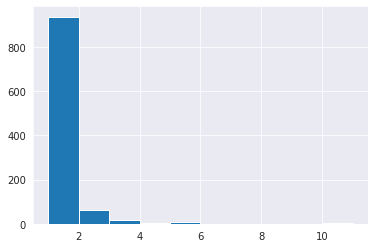

In [46]:
plt.hist(ordersByUsers['orders']) 

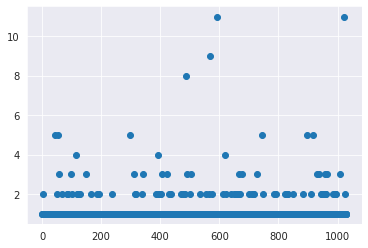

In [47]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x = ordersByUsers.index , y = ordersByUsers['orders']) 
#plt.ylim(0, 7)

### <a id="step12"></a>Задача 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [48]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


### <a id="step13"></a>Задача 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

(0, 100000)

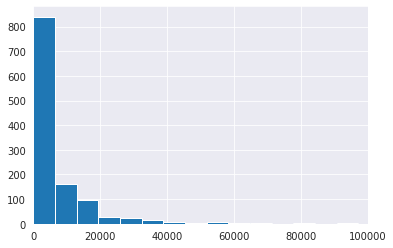

In [49]:
plt.hist(orders['revenue'],  bins = 200) 
plt.xlim(0, 100000)

(0, 60000)

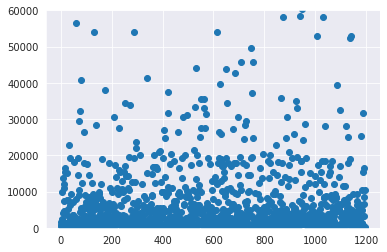

In [50]:
plt.scatter(x = orders.index , y = orders['revenue']) 
plt.ylim(0, 60000)

### <a id="step14"></a>Задача 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [51]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


### <a id="step15"></a>Задача 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [52]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]

In [53]:
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [54]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [55]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [56]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [57]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [58]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [59]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [60]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [61]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [62]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [63]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [64]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [65]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [66]:
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [67]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

In [68]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                     name='orders')],axis=0)

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-значение:  0.0000000000
Отвергаем H0: распределение не нормальное


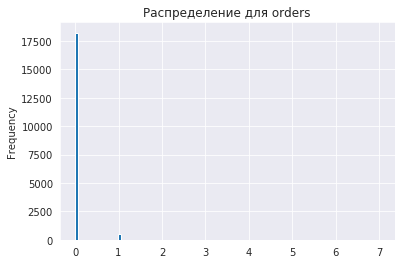

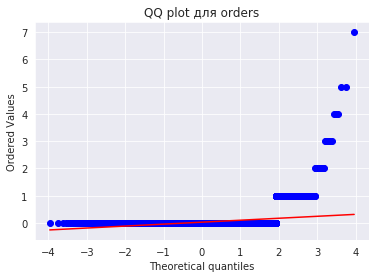

In [69]:
shapiro_wilk_test(sampleA)

In [70]:
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                     name='orders')],axis=0) 

p-значение:  0.0000000000
Отвергаем H0: распределение не нормальное


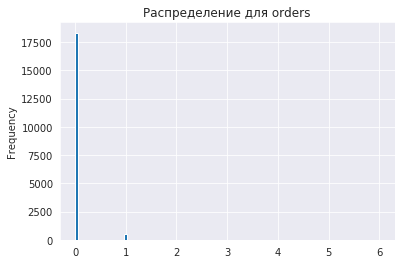

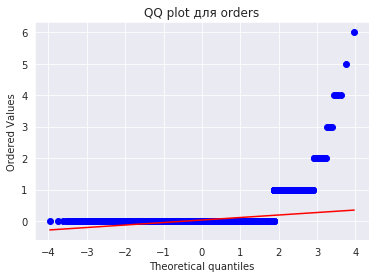

In [71]:
shapiro_wilk_test(sampleB)

Т.к. распределения не нормальные испольуем критерий Манна-Уитни

In [72]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value 0.008
0.138


<div class="alert alert-block alert-info">
Сформулируем гипотезы: <br>
    H0: Нет статистически значимых различий в конверсии между группами А и В.<br>
    H1: Есть статистически значимые различия в конверсии между группами А и В.<br>
    
</div>

#### `p < 0.05` значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет -  отвергаем.  
Относительный выигрыш группы B равен 13.8%

### <a id="step16"></a>Задача 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [73]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.365
0.259


<div class="alert alert-block alert-info">
Сформулируем гипотезы: <br>
    H0: Нет статистически значимых различий среднего чека между группами А и В.<br>
    H1: Есть статистически значимые различия среднего чека между группами А и В.<br>
    
</div>

#### P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### <a id="step17"></a>Задача 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Напомним, что 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders`

In [74]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям.

Сделаем срезы пользователейсовершивших заказы дороже 28 000 — `usersWithExpensiveOrders`.  
Объединим их в таблице `abnormalUsers`

In [75]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

Узнаем, сколько всего аномальных пользователей методом shape().

In [76]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


In [77]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                             name='orders')],axis=0)

In [78]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0) 

In [79]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.007
0.173


#### `p < 0.05` значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет -  отвергаем.  
Относительный выигрыш группы B равен 17.3%

### <a id="step18"></a>Задача 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [80]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

p-value 0.369


#### `p > 0.05` значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет -  не отвергаем.  


#### Как мы и предполагали в среднем чеке есть выбросы - аномально большие заказы. После "очистки" данных критерий Манна-Уитни показал, что статистически значимых различий в среднем чеке - нет.

In [81]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

-0.020


Впрочем, средний чек группы B стал ниже среднего чека группы A.

### <a id="step19"></a>Задача 14. Примите решение по результатам теста и объясните его. 
Варианты решений:  
A. Остановить тест, зафиксировать победу одной из групп.   
B. Остановить тест, зафиксировать отсутствие различий между группами.  
C. Продолжить тест.  

<div style="border:solid black 2px; padding: 20px"> <h1 style="color:black; margin-bottom:20px">Вывод</h1>
Останавливаем тест.  <br>
Фиксируем победу группы `B` .<br>
Признаем тест успешным.  <br>
После "очистки" данных получили стат. знач. в конверсии. Конверсия группы `В` лучше на 17.8%. Средний чек - не изменился. <br>
Т.е. средний чек не изменился, а конверсия увеличилась. 
          
</div>

<div class="alert alert-block alert-info"> 
    <div style="border:solid black 2px; padding: 20px">
     <h1 style="color:blue; margin-bottom:20px">Вывод</h1>
        
Приоритизиуя гипотезы согласно `ICE` и `RICE` методам рекомендую проверить первыми 2 гипотезы:  <br>
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	<br>
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	<br>

Останавливаем тест.  <br>
Фиксируем победу группы `B` .<br>
Признаем тест успешным.  <br>
После "очистки" данных получили стат. знач. в конверсии. Конверсия группы `В` лучше на 17.8%. Стат. знач. различий в среднем чеке не выявлено. <br>
Т.е. средний чек не изменился, а конверсия увеличилась, что потверждают графики по "очищенным" данным ниже. 
          
</div>

<div class="alert alert-block alert-info">
    
### Графики по "очищенным" данным. 
</div>

In [82]:
# revenue_95 = np.percentile(orders['revenue'], 95)
# print('95 персентиль выручки ', revenue_95)

# orders_clean = orders.query('revenue <= @revenue_95')

In [83]:
orders_clean = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]                        

In [84]:
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [85]:
ordersAggregated_clean = datesGroups.apply(
    lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [86]:
cumulativeData_clean = ordersAggregated_clean.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [87]:
cumulativeData_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [88]:
cumulativeRevenueA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B'][['date','revenue', 'orders']]

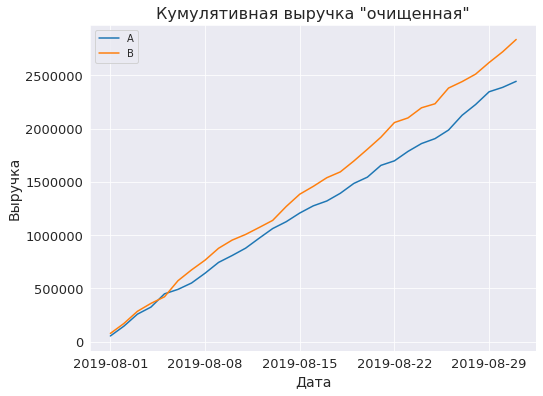

In [89]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue'], label='A')
plt.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue'], label='B')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax.tick_params(axis = 'both',               
               labelsize = 13,          
               )
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Выручка',fontsize=14)
plt.title('Кумулятивная выручка "очищенная"',fontsize=16)
plt.legend();
#plt.show()

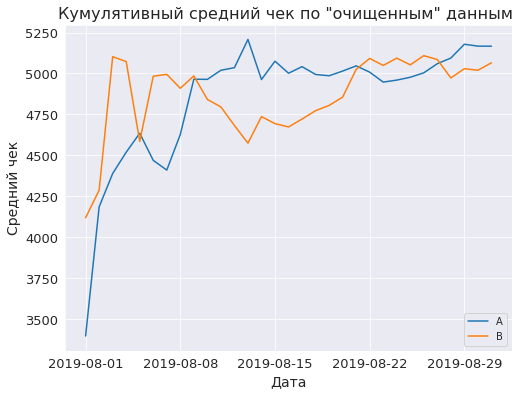

In [90]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue']/cumulativeRevenueA_clean['orders'], label='A')
plt.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue']/cumulativeRevenueB_clean['orders'], label='B')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Средний чек',fontsize=14)
plt.title('Кумулятивный средний чек по "очищенным" данным ',fontsize=16)
plt.legend();

In [91]:
mergedCumulativeRevenue_clean = cumulativeRevenueA_clean.merge(cumulativeRevenueB_clean, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B']) 

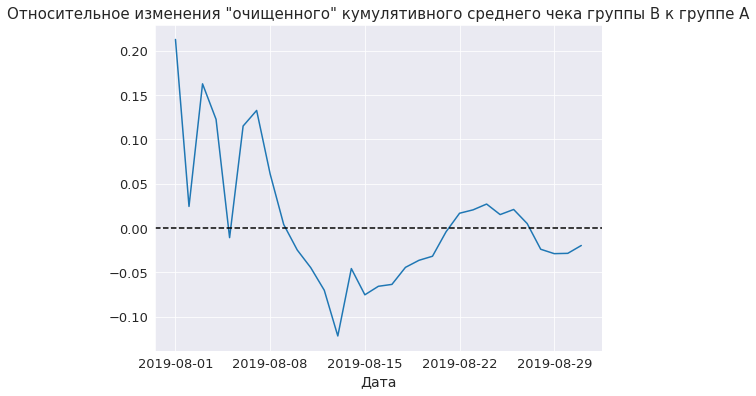

In [92]:
plt.subplots(figsize = (8,6))
plt.plot(mergedCumulativeRevenue_clean['date'], (mergedCumulativeRevenue_clean['revenueB']/
                                           mergedCumulativeRevenue_clean['ordersB'])/
         (mergedCumulativeRevenue_clean['revenueA']/mergedCumulativeRevenue_clean['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
#ax.set_ylabel('Средний чек',fontsize=14)
plt.title('Относительное изменения "очищенного" кумулятивного среднего чека группы B к группе A',fontsize=15);

In [93]:
cumulativeData_clean['conversion'] = cumulativeData_clean['orders']/cumulativeData['visitors']

In [94]:
# отделяем данные по группе A
cumulativeDataA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A']

# отделяем данные по группе B
cumulativeDataB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B']

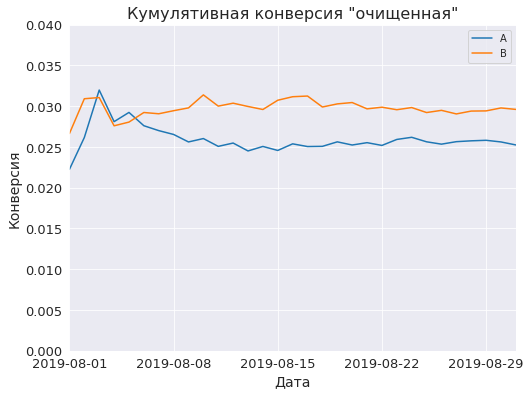

In [95]:
plt.subplots(figsize = (8,6))
plt.plot(cumulativeDataA_clean['date'], cumulativeDataA_clean['conversion'], label='A')
plt.plot(cumulativeDataB_clean['date'], cumulativeDataB_clean['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31',0, 0.04])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
ax.set_ylabel('Конверсия',fontsize=14)
plt.title('Кумулятивная конверсия "очищенная"',fontsize=16);

In [96]:
mergedCumulativeConversions_clean = cumulativeDataA_clean[['date','conversion']].merge(
    cumulativeDataB_clean[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

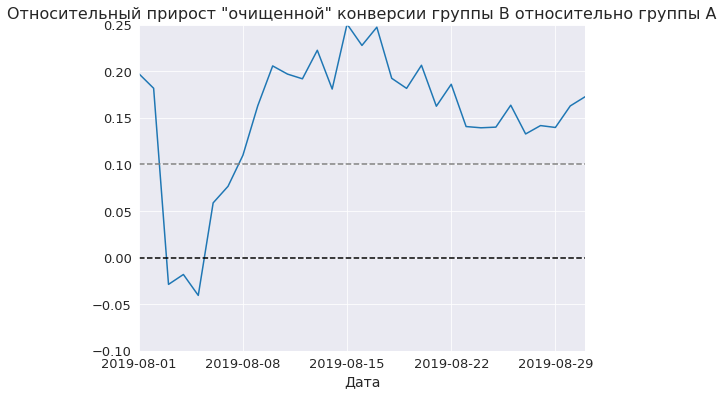

In [97]:
plt.subplots(figsize = (8,6))
plt.plot(mergedCumulativeConversions_clean['date'], mergedCumulativeConversions_clean['conversionB']/
         mergedCumulativeConversions_clean['conversionA']-1)
#plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31',-0.1, 0.25])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'both',  
               labelsize = 13)
ax.set_xlabel('Дата',fontsize=14)
#ax.set_ylabel('Конверсия',fontsize=14)
plt.title('Относительный прирост "очищенной" конверсии группы B относительно группы A',fontsize=16);